# Biodiversity

Here we walktrough some data on species observed in several national parks in the US. We first organize the data and then explore it in order to raise and answer questions. As one will see from the provided information, natural questions are:
1) How rarely Endangered species are seen and where?\
2) Which National park houses the greatest number of animals, therefore needs more care?\
3) Which national park is richer in diversity?
4) Which category of species are more seen and more endangered?


Here we assume the hypothesis that the number of observations, normalized by the number of visitors, corresponds to the number of different animals observed.

## Loading the modules

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

observations = pd.read_csv("observations.csv")
species_info = pd.read_csv("species_info.csv").fillna("None") #from inspections we understand that the NaN values in the table corresponds to species with unknown status, frequently not endangered.

In [2]:
print(species_info)
print(observations)

            category                scientific_name  \
0             Mammal  Clethrionomys gapperi gapperi   
1             Mammal                      Bos bison   
2             Mammal                     Bos taurus   
3             Mammal                     Ovis aries   
4             Mammal                 Cervus elaphus   
...              ...                            ...   
5819  Vascular Plant               Solanum parishii   
5820  Vascular Plant                  Solanum xanti   
5821  Vascular Plant         Parthenocissus vitacea   
5822  Vascular Plant              Vitis californica   
5823  Vascular Plant            Tribulus terrestris   

                                           common_names conservation_status  
0                              Gapper's Red-Backed Vole                None  
1                                 American Bison, Bison                None  
2     Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                None  
3     Domestic Sheep, Moufl

# Splitting the data 

By a direct inspection of the data, we find it natural to group the observation data by species and park. Once done, we can combine both tables in order to have a better picture of the situation. In order to take our hypothesis in consideration, we renormalize the number of observations according to the number of visits.



In [3]:
main = pd.merge(species_info, observations, how="outer", on="scientific_name")

# here we include the information on visitors per year, extracted from wikipedia
vst_norm = {  "Bryce National Park":2679478/14137812 , "Great Smoky Mountains National Park": 14137812/14137812, "Yellowstone National Park": 3806306/14137812, "Yosemite National Park":2268313/14137812  }

main["observations"]=main.apply(lambda row: round(row["observations"]/vst_norm[row["park_name"]],2),axis=1)


df_multi = [main[main["conservation_status"]==x].groupby("scientific_name").observations.sum()  for x in main.conservation_status.unique()]

len_cons_sta = {  main.conservation_status.unique()[k]:len(df_multi[k]) for k in range(5)  } 

print(len_cons_sta)

print(main)


{'None': 5363, 'Species of Concern': 151, 'Endangered': 15, 'In Recovery': 4, 'Threatened': 10}
             category                scientific_name  \
0              Mammal  Clethrionomys gapperi gapperi   
1              Mammal  Clethrionomys gapperi gapperi   
2              Mammal  Clethrionomys gapperi gapperi   
3              Mammal  Clethrionomys gapperi gapperi   
4              Mammal                      Bos bison   
...               ...                            ...   
25627  Vascular Plant              Vitis californica   
25628  Vascular Plant            Tribulus terrestris   
25629  Vascular Plant            Tribulus terrestris   
25630  Vascular Plant            Tribulus terrestris   
25631  Vascular Plant            Tribulus terrestris   

                                            common_names conservation_status  \
0                               Gapper's Red-Backed Vole                None   
1                               Gapper's Red-Backed Vole               

In order to answer the questions above, let us aggregate the information in different forms: first by name and park, second by park and conservation status. With the first table, one can easily answer the question 'In which park it is easier to find my favorite speciemen?' or, more importantly, help us understand the biodiversity of each park. The second table gives us a better view on the situation of endangered species, and how they are distributed across the parks. We renormalize the table of observations with respect to the number of visitors in order to have a better comparisom between the numbers (visitors and area retrieved from wikipedia).

In [4]:
by_species = main.groupby(["scientific_name","park_name"]).observations.sum()

print(by_species.head())

by_species = main.groupby(["scientific_name","park_name"]).observations.sum().reset_index()



scientific_name  park_name                          
Abies bifolia    Bryce National Park                    575.12
                 Great Smoky Mountains National Park     72.00
                 Yellowstone National Park              798.58
                 Yosemite National Park                 847.65
Abies concolor   Bryce National Park                    437.94
Name: observations, dtype: float64


Next we study the degree of endargenment of in each conservation status. To our surprise, the renormalized number of observations by each speciemen in the "Endangered" and "Species of Concern" classes are not far apart. This fact makes one think that the species in the latter should be relabeled.

In the next section we compare the degree of danger associated to each speciemen.

In [10]:
by_park = main.groupby(["conservation_status","park_name"])\
    .agg(total_observations = ("observations",np.nansum))\
    .reset_index()

by_park['avg_obs_per_speciemen'] = by_park.apply(lambda row: round(row['total_observations']/len_cons_sta[row["conservation_status"]],2),axis=1)



indexes = by_park['conservation_status'].unique()


# Below we create a table with general information on the parks, including their extension and number of visitors per year. The latter is renormalized to make comparisons clearer.



area_extension = [35835, 522419, 2219791 , 759620]

# by_park.set_index(["conservation_status", "park_name"],inplace=True)

print(by_park)


   conservation_status                            park_name  \
0           Endangered                  Bryce National Park   
1           Endangered  Great Smoky Mountains National Park   
2           Endangered            Yellowstone National Park   
3           Endangered               Yosemite National Park   
4          In Recovery                  Bryce National Park   
5          In Recovery  Great Smoky Mountains National Park   
6          In Recovery            Yellowstone National Park   
7          In Recovery               Yosemite National Park   
8                 None                  Bryce National Park   
9                 None  Great Smoky Mountains National Park   
10                None            Yellowstone National Park   
11                None               Yosemite National Park   
12  Species of Concern                  Bryce National Park   
13  Species of Concern  Great Smoky Mountains National Park   
14  Species of Concern            Yellowstone National 

# Biodiversity

# Relative demography

We use the by_park dataframe to understand which park houses the greatest number of animals. Note that the column "total_observations" is already normalized acoording to our hypothesis, therefore we just need to vizualize the data. 

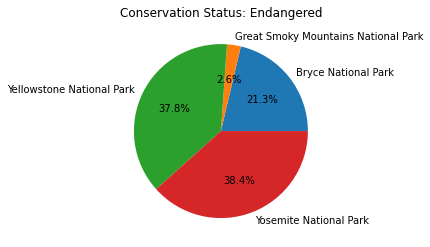

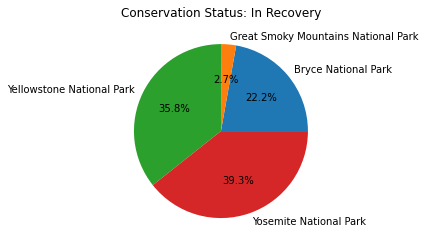

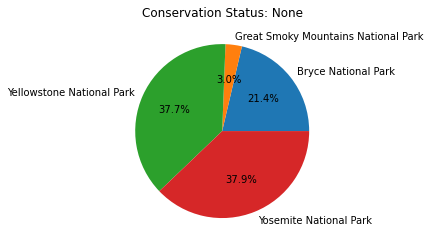

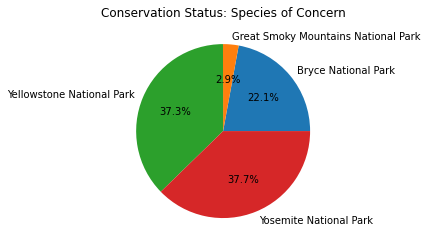

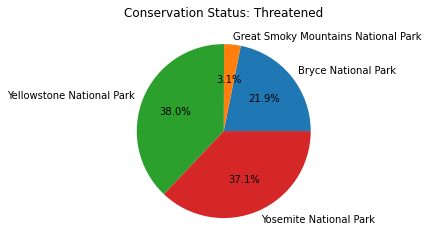

In [11]:
# Let's plot our finding so we have a better view on how the speciemes are distributed.

for x,frame in by_park.groupby("conservation_status"):
    plt.pie(frame["total_observations"],labels = frame["park_name"].unique(),autopct = '%.1f%%')
    plt.title("Conservation Status: " + x)
    plt.show()
    


A direct conclusion is that the Yosemite and Yellowstone National Parks houses more than 70% of individuals in each conservation status. Therefore, they require greater care and attention.

# Comparing Conservation Statuses

In [12]:
conservation = by_park.groupby("conservation_status").avg_obs_per_speciemen.mean()

print(conservation)

conservation_status
Endangered            255.3900
In Recovery           576.5475
None                  707.9350
Species of Concern    671.3975
Threatened            356.7275
Name: avg_obs_per_speciemen, dtype: float64


A second question in this topic is to understand which species are in greater danger. Let's understand which species have an average number of observations less than the Endangered mean. We compare with the current list of endangered species.

In [20]:
avg_species = by_species.groupby("scientific_name").observations.sum()

avg_species = avg_species/15

new_endangered_species = avg_species[avg_species <= 255.39]



endangered_species = main[main["conservation_status"] ==  "Endangered"].groupby("scientific_name").observations.sum()

endangered_species = endangered_species/len(endangered_species)


print(endangered_species)
print(new_endangered_species)
print(len(new_endangered_species))
print(np.std(new_endangered_species))



68.10431111111112
scientific_name
Canis lupus                     425.636000
Canis rufus                      40.404000
Chasmistes liorus                40.262667
Etheostoma percnurum             44.814667
Geum radiatum                    45.723333
Glaucomys sabrinus coloratus     43.150000
Grus americana                   38.797333
Gymnogyps californianus          46.930000
Myotis grisescens                44.274000
Myotis sodalis                   42.227333
Noturus baileyi                  38.744000
Ovis canadensis sierrae          42.201333
Picoides borealis                43.157333
Rana sierrae                     43.947333
Vermivora bachmanii              41.295333
Name: observations, dtype: float64
scientific_name
Abies bifolia                          152.890000
Abies concolor                         180.786667
Abies fraseri                          143.429333
Abietinella abietina                   176.072000
Abronia ammophila                      149.059333
                    